In [403]:
import pandas as pd

rssi_data = pd.read_csv('./Collection_Rssi.csv') # 데이터 가져오기
rssi_data.head()

,RSSI1,RSSI2,RSSI3,RSSI4,X,Y
0,42,55,71,65,1,1
1,42,56,65,65,1,1
2,41,55,65,69,1,1
3,42,55,71,68,1,1
4,42,56,65,69,1,1


In [404]:
# Feature / Label 데이터 분리하기
X = rssi_data.drop(['X','Y'], axis = 1)
y = rssi_data.drop(['RSSI1','RSSI2','RSSI3','RSSI4'],axis = 1) 

print(X.head())
print(y.head())

   RSSI1  RSSI2  RSSI3  RSSI4
0     42     55     71     65
1     42     56     65     65
2     41     55     65     69
3     42     55     71     68
4     42     56     65     69
   X  Y
0  1  1
1  1  1
2  1  1
3  1  1
4  1  1


## 이전 시각화 그래프에서 예측했던 StandardScaler 방법을 통해 LinearRegression 모델을 학습시켜보자.

In [405]:
# StandardScaler를 통한 Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ss,y,test_size = 0.2, random_state = 13)

In [406]:
# Label 값은 (x,y) 로 두 개의 값이 필요하므로 
# 2개의 LinearRegression 학습모델을 통해 학습
from sklearn.linear_model import LinearRegression

reg_x = LinearRegression()
reg_y = LinearRegression()

reg_x.fit(X_train, y_train['X'])
reg_y.fit(X_train, y_train['Y'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [407]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_predict_X = reg_x.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train['X'],y_train_predict_X)))
print('The mopdel performance of X for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for training set
----------------------------------------
RMSE : 1.0735913039809497


In [408]:
from sklearn.metrics import mean_squared_error

y_train_predict_Y = reg_y.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train['Y'],y_train_predict_Y)))
print('The mopdel performance of Y for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of Y for training set
----------------------------------------
RMSE : 0.9132580768807769


## 학습 모델의 결과를 시각화하여 확인해보자.

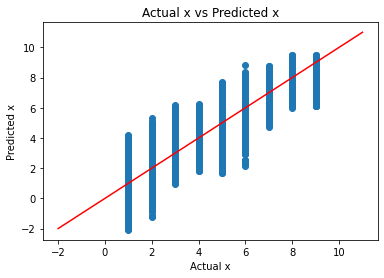

In [409]:

import matplotlib.pyplot as plt

plt.scatter(y_train['X'],y_train_predict_X)
plt.xlabel('Actual x')
plt.ylabel('Predicted x')
plt.title("Actual x vs Predicted x")
plt.plot([-2,11],[-2,11],'r')

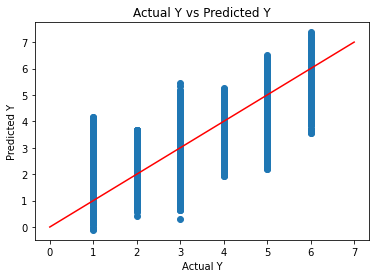

In [410]:
plt.scatter(y_train['Y'],y_train_predict_Y)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title("Actual Y vs Predicted Y")
plt.plot([0,7],[0,7],'r')

# 예측 모델이 예측한 범위의 평균값이 실제 y와 근사한 값을 갖고있음을 확인할 수 있다 

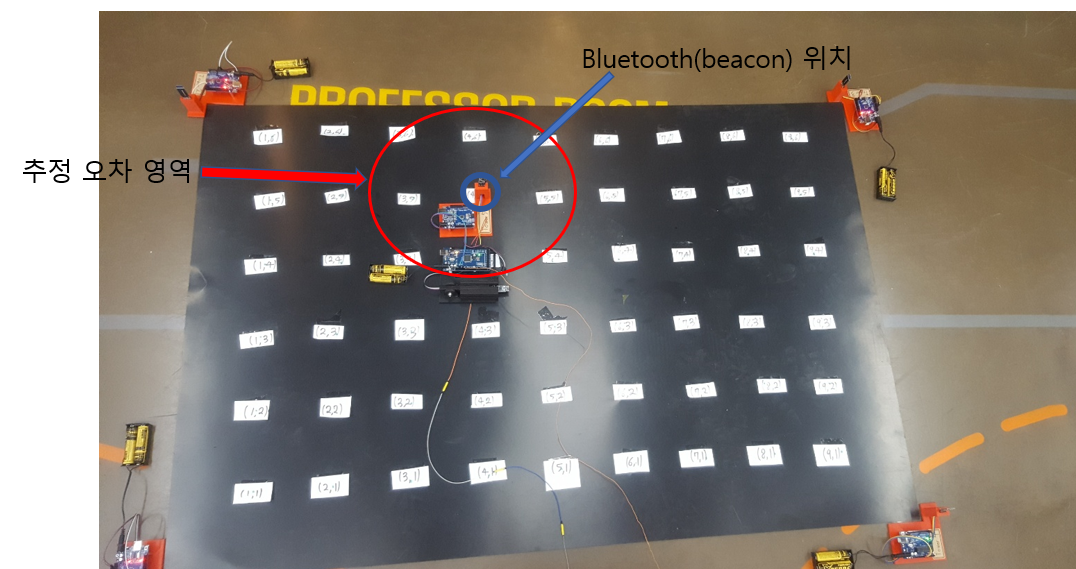

## 학습 모델의 오차 영역은 x,y 값이 각각 1정도 rmse 오차를 갖으므로 (좌표 1 크기 = 15cm)
#  sqrt(1.074^2 + 0.913^2) * 15 cm = 21.14 cm 의 오차를 갖는다.
(  맵의 크기 : 1.5m * 1m)



In [411]:
#  test data 에 대해 성능을 확인해보자.

y_test_predict_X  = reg_x.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test['X'],y_test_predict_X)))
print('The mopdel performance of X for test set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for test set
----------------------------------------
RMSE : 1.1153763015942542


In [412]:
from sklearn.metrics import mean_squared_error

y_test_predict_Y = reg_y.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test['Y'],y_test_predict_Y)))
print('The mopdel performance of Y for test set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of Y for test set
----------------------------------------
RMSE : 0.9307234257723207


## test set 예측 결과, train set과 유사한 결과 확인 가능함 !

# normalization을 하지 않았을 때, MinMaxScaler 방식을 사용했을 때 예측을 확인해보자.

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 13)

reg_x = LinearRegression()
reg_y = LinearRegression()

reg_x.fit(X_train, y_train['X'])
reg_y.fit(X_train, y_train['Y'])
y_train_predict_X = reg_x.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train['X'],y_train_predict_X)))
print('The mopdel performance of X for training set')
print('----------------------------------------')
print('RMSE :',rmse)

y_train_predict_Y = reg_y.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train['Y'],y_train_predict_Y)))
print('The mopdel performance of Y for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for training set
----------------------------------------
RMSE : 1.0735913039809497
The mopdel performance of Y for training set
----------------------------------------
RMSE : 0.9132580768807769


In [414]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
MMS.fit(X)

X_mms = MMS.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_mms,y,test_size = 0.2, random_state = 13)
reg_x = LinearRegression()
reg_y = LinearRegression()

reg_x.fit(X_train, y_train['X'])
reg_y.fit(X_train, y_train['Y'])
y_train_predict_X = reg_x.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train['X'],y_train_predict_X)))
print('The mopdel performance of X for training set')
print('----------------------------------------')
print('RMSE :',rmse)

y_train_predict_Y = reg_y.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train['Y'],y_train_predict_Y)))
print('The mopdel performance of Y for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for training set
----------------------------------------
RMSE : 1.0735913039809497
The mopdel performance of Y for training set
----------------------------------------
RMSE : 0.9132580768807769


### 이전 데이터 시각화에서 예상했던 normalization 방법으로 StandardScaler이 적합할 것이라는 예측과 달리, 어떤 정규화 방법을 사용하든 차이가 전혀 없었다.
###(normalization 하지 않을때, StandardScaler 적용 했을때, MinMaxScaler 적용했을 때 rmse가 모두 정확히 같은 값이 나왔다.)

# -->  LinearRegression의 경우에는, y(Label) 의 차이에 의해(MeanSquareError) rmse 값이 결정되므로, Normalization은 LinearRegression 모델의 전처리에 유효한 방법이 아니다.

# 적합한 전처리 방법을 적용해보자.
- 데이터 수집과정에서 RSSI 값 중 하나라도 결측값이 존재 하는 경우는 수집하지 않았으므로, 결측값 처리는 하지 않아도 된다. 

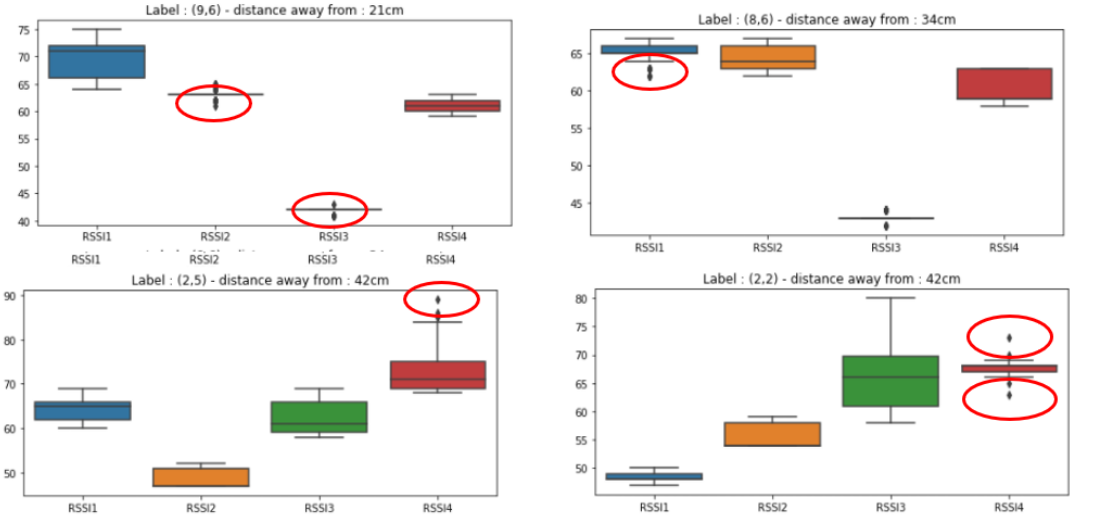

### 이전에 데이터 시각화를 통해 관찰한 그래프 중 이상치 발생한 그래프를 일부 가져왔다. 각 수집된 RSSI 값에는 모델을 왜곡할 가능성이 있는 이상값이 존재함을 확인할 수 있다. 이를 처리하자.


## 센싱된 데이터는 이상치를 포함하고 있을 수 있으므로 전체 데이터셋에 대해 이상치를 처리하는 것이 아닌, Train Data의 이상치 값을 처리하여 학습모델을 구축하고, 이상치를 포함한 실제 TestData를 통해 성능을 확인해보자




In [415]:
# Feature / Label 데이터 분리
X = rssi_data.drop(['X','Y'], axis = 1)
y = rssi_data.drop(['RSSI1','RSSI2','RSSI3','RSSI4'],axis = 1) 


In [416]:
# Trainning data / Test data 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 13)

### X_train 과 y_train을 합쳐 Train data를 구축한다.

In [417]:
# Trainning Data Set에 대한 이상치를 처리하여 학습모델을 구축하기 위해 
# X_train 데이터와 y_train 데이터를 합친 df를 만듬
TrainData = pd.concat([X_train,y_train],axis = 1, join = 'inner')
print(TrainData)

       RSSI1  RSSI2  RSSI3  RSSI4  X  Y
1457      65     65     63     45  9  1
9758      67     40     78     77  1  6
5589      68     57     62     70  1  4
83        42     55     60     69  1  1
10347     64     54     57     63  4  6
...      ...    ...    ...    ... .. ..
866       61     67     55     66  6  1
10982     69     68     49     64  7  6
7696      69     47     65     74  1  5
74        42     53     64     69  1  1
338       49     59     67     71  3  1

[9180 rows x 6 columns]


In [418]:
#outlier 인덱스를 찾기 위한 함수
def get_outlier(df=None,x=None,y=None,col=None):
  
  rssi = TrainData[(TrainData['X'] == x)&(TrainData['Y'] == y)][col]
  quantile_25 = np.percentile(rssi.values,25)
  quantile_75 = np.percentile(rssi.values,75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*1.5
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  outlier_index = rssi[(rssi < lowest_val) | (rssi > highest_val)].index
  
  return outlier_index

In [419]:
# outlier 인덱스의 지정한 행을 제거해주는 함수
def del_Row(df=None,outlier_index=None):
  before = df.shape[0]
  df.drop(outlier_index,axis=0,inplace=True)
  after = df.shape[0]
  
  print("   {}개 행데이터를 삭제했습니다.".format(before-after))
  


In [420]:
# 위 두 함수를 이용하여
# RSSI1,2,3,4 열에 대해 반복하여 삭제할 수 있도록 한다.
def iteration_del(df=None,x=None,y=None):
  print("({},{})에 대하여 이상치 처리 결과".format(x,y))
  col = ['RSSI1','RSSI2','RSSI3','RSSI4']
  for i in col:
    print("{} 열에서".format(i))
    del_Row(df,outlier_index=get_outlier(df,x,y,i))
  print("=====================================")

In [421]:
for y in [1,2,3,4,5,6]: # y값은 1~6
  for x in [1,2,3,4,5,6,7,8,9]: # x 값은 1~9
    iteration_del(df = TrainData,x=x,y=y)

(1,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(2,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(3,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(4,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(5,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(6,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   0개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   0개 행데이터를 삭제했습니다.
(7,1)에 대하여 이상치 처리 결과
RSSI1 열에서
   0개 행데이터를 삭제했습니다.
RSSI2 열에서
   6개 행데이터를 삭제했습니다.
RSSI3 열에서
   0개 행데이터를 삭제했습니다.
RSSI4 열에서
   1개 행데이터를 삭제했습니다.
(8,1)에 대하여 이상

이상치 처리결과, 이상치는 균일하게 존재하는 것이 아닌 어느 한 순간에 급격한 숫자의 이상치가 발생함을 확인할 수 있다.

### Train Data에 대해 이상치를 처리했으므로, 다시 X_train과 y_train으로 분리하여 학습시킨다.

In [422]:
X_train = TrainData.loc[:,['RSSI1','RSSI2','RSSI3','RSSI4']]
y_train =TrainData.loc[:,['X','Y']]

In [423]:
reg_x = LinearRegression()
reg_y = LinearRegression()

reg_x.fit(X_train, y_train['X'])
reg_y.fit(X_train, y_train['Y'])
y_train_predict_X = reg_x.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train['X'],y_train_predict_X)))
print('The mopdel performance of X for training set')
print('----------------------------------------')
print('RMSE :',rmse)

y_train_predict_Y = reg_y.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train['Y'],y_train_predict_Y)))
print('The mopdel performance of Y for training set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for training set
----------------------------------------
RMSE : 1.0738803484435784
The mopdel performance of Y for training set
----------------------------------------
RMSE : 0.9219396929104383


In [424]:
#  test data 에 대해 성능을 확인해보자.

y_test_predict_X  = reg_x.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test['X'],y_test_predict_X)))
print('The mopdel performance of X for test set')
print('----------------------------------------')
print('RMSE :',rmse)

y_test_predict_Y = reg_y.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test['Y'],y_test_predict_Y)))
print('The mopdel performance of Y for test set')
print('----------------------------------------')
print('RMSE :',rmse)

The mopdel performance of X for test set
----------------------------------------
RMSE : 1.1170554929155512
The mopdel performance of Y for test set
----------------------------------------
RMSE : 0.9303024365675366


# 결론

이상치를 처리했음에도 불구하고 결과에 큰 영향을 주지 않았다. 위의 이상치 처리한 출력문을 확인해보면, 이상치가 발생하는 경우에는 각 좌표에 대해 균일하게 존재하는 것이 아닌, 주기적으로 이상치가 급격히 발생하고 없어지기 때문에 전처리에 효과적인 방법이 아닌 것으로 추정된다.
그럼에도 LinearRegression을 이용한 실내 위치 측위는 1.5m*1m 환경에서 대략 20cm의 오차로 측위가 가능했으며 기회가 된다면 맵의 크기를 늘려서 위치측위를 해볼 수 있는 기회가 있으면 좋을 것 같다.